In [9]:
import os
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [10]:
fair1m_val_labels = "D:\\stuff\\datasets\\FAIR1M\\fair1m_date_1922\\val\\labelTxt"
fair1m_train_labels = "D:\\stuff\\datasets\\FAIR1M\\fair1m_date_1922\\train\\labelTxt"
dior_labels = "D:\\stuff\\datasets\\DIOR\\archive\\labels"
dotav2_val_labels = "D:\\stuff\\datasets\\DOTAv2\\DOTAv2\\labels\\DOTA-v2.0_val (original format)"
dotav2_train_labels = "D:\\stuff\\datasets\\DOTAv2\\DOTAv2\\labels\\DOTA-v2.0_train (original format)"

DIOR_CLASSES = {
    "Storage tank": 0,
    "Baseball field": 1,
    "Tennis court": 2,
    "Basketball court": 3,
    "Wind mill": 4,
    "Vehicle": 5,
    "Harbor": 6,
    "Ship": 7,
    "Airplane": 8,
    "Bridge": 9,
    "Overpass": 10,
    "Expressway toll station": 11,
    "Train station": 12,
    "Chimney": 13,
    "Ground track field": 14,
    "Dam": 15,
    "Expressway service area": 16,
    "Stadium": 17,
    "Airport": 18,
    "Golf course": 19,
}

In [11]:
def count_objects_from_folder(path):
    counts = Counter()
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file)) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 2:
                        obj = parts[-2]  # second last is object label
                        counts[obj] += 1
    return counts


def count_objects_from_folder_dior(path):
    counts = Counter()
    for file in os.listdir(path):
        if file.endswith(".txt"):
            with open(os.path.join(path, file)) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 2:
                        obj = parts[0]  # first is object label
                        counts[obj] += 1
    return counts


def combine_counts(path1, path2):
    total_counts = count_objects_from_folder(path1) + count_objects_from_folder(path2)
    return total_counts

In [12]:
cnt = 0
counts = combine_counts(fair1m_val_labels, fair1m_train_labels)
for obj, count in counts.most_common():
    cnt += count
    print(f"{obj}: {count}")
print(f"\nTOTAL FAIR1M: {cnt}")

Small-Car: 206491
Van: 200106
Dump-Truck: 33868
Dry-Cargo-Ship: 16879
Cargo-Truck: 16259
Motorboat: 15347
other-airplane: 14305
Intersection: 10156
Fishing-Boat: 8930
A220: 8154
other-vehicle: 6445
Boeing737: 5881
Tennis-Court: 4219
other-ship: 4215
Engineering-Ship: 3777
Liquid-Cargo-Ship: 3731
A321: 3611
Boeing747: 2476
Boeing787: 2300
A330: 2134
Passenger-Ship: 1858
Tugboat: 1855
Boeing777: 1780
Bus: 1673
Basketball-Court: 1666
Bridge: 1621
Baseball-Field: 1403
A350: 1396
Truck-Tractor: 1348
Excavator: 1280
Trailer: 1183
Football-Field: 1181
Warship: 1134
Roundabout: 833
ARJ21: 304
Tractor: 298
C919: 158

TOTAL FAIR1M: 590255


In [13]:
cnt = 0
counts = count_objects_from_folder_dior(dior_labels)
for obj, count in counts.most_common():
    cnt += count
    print(f"{obj}: {count}")
print(f"\nTOTAL DIOR: {cnt}")

7: 62400
5: 40370
0: 26414
2: 12266
8: 10104
1: 5817
6: 5509
4: 5363
9: 3967
3: 3225
10: 3114
14: 3038
16: 2165
13: 1681
18: 1327
11: 1298
17: 1268
19: 1086
15: 1049
12: 1011

TOTAL DIOR: 192472


In [14]:
cnt = 0
counts = combine_counts(dotav2_val_labels, dotav2_train_labels)
for obj, count in counts.most_common():
    cnt += count
    print(f"{obj}: {count}")
print(f"\nTOTAL DOTAv2: {cnt}")

small-vehicle: 219330
ship: 54353
large-vehicle: 29941
plane: 11365
storage-tank: 10617
harbor: 8902
tennis-court: 3560
swimming-pool: 3230
bridge: 3043
baseball-diamond: 965
roundabout: 885
helicopter: 730
basketball-court: 711
ground-track-field: 684
soccer-ball-field: 573
airport: 410
container-crane: 270
helipad: 106

TOTAL DOTAv2: 349675


In [15]:
def search_object(path, target, max_results=None, dataset_name=""):
    results = []
    for file in os.listdir(path):
        if file.endswith(".txt"):
            filepath = os.path.join(path, file)
            with open(filepath) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 2 and parts[-2] == target:
                        results.append(f"[{dataset_name}] {filepath}")
                        break  # only record each file once
        if max_results and len(results) >= max_results:
            break
    return results


def search_object_dior(path, target, max_results=None, dataset_name=""):
    results = []

    if target not in DIOR_CLASSES:
        print(f"Class '{target}' not found.")
        return results

    target_id = str(DIOR_CLASSES[target])

    for file in os.listdir(path):
        if file.endswith(".txt"):
            filepath = os.path.join(path, file)
            with open(filepath) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) >= 2 and parts[0] == target_id:
                        results.append(f"[{dataset_name}] {filepath}")
                        break  # only record each file once
        if max_results and len(results) >= max_results:
            break
    return results

In [16]:
# FAIR1M
print("FAIR1M:")
results_val = search_object(fair1m_val_labels, "other-vehicle", 10, dataset_name="val")
results_train = search_object(fair1m_train_labels, "other-vehicle", 10, dataset_name="train")
for r in results_val + results_train:
    print(r)

# DIOR
print("\nDIOR:")
results_dior = search_object_dior(dior_labels, "Vehicle", 10, dataset_name="valandtrain")
for r in results_dior:
    print(r)

# DOTAv2
print("\nDOTAv2:")
results_val = search_object(dotav2_val_labels, "large-vehicle", 10, dataset_name="val")
results_train = search_object(dotav2_train_labels, "large-vehicle", 10, dataset_name="train")
for r in results_val + results_train:
    print(r)

FAIR1M:
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1007.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1011.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1016.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1020.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1022.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1029.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\103.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1040.txt
[val] D:\stuff\datasets\FAIR1M\fair1m_date_1922\val\labelTxt\1047.txt
[train] D:\stuff\datasets\FAIR1M\fair1m_date_1922\train\labelTxt\1001.txt
[train] D:\stuff\datasets\FAIR1M\fair1m_date_1922\train\labelTxt\10026.txt
[train] D:\stuff\datasets\FAIR1M\fair1m_date_1922\train\labelTxt\10052.txt
[train] D:\stuff\datasets\FAIR1M\fair1m_date_1922\train\labelTxt\10072.t

In [ ]:
def show_image_with_boxes_fair1m(image_path, label_path):
    img = cv2.imread(image_path)
    with open(label_path) as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 9:
                coords = list(map(int, parts[:8]))
                cls = parts[8]
                pts = [(coords[i], coords[i + 1]) for i in range(0, 8, 2)]
                pts_array = cv2.convexHull(np.array(pts, dtype="int32"))
                cv2.polylines(img, [pts_array], isClosed=True, color=(0, 255, 0), thickness=2)
                x, y = pts[0]
                cv2.putText(img, cls, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()


def show_image_with_boxes_dior(image_path, label_path):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]

    with open(label_path) as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id = int(parts[0])
                cx, cy, bw, bh = map(float, parts[1:])
                cls_name = list(DIOR_CLASSES.keys())[list(DIOR_CLASSES.values()).index(class_id)]

                # Convert from normalized cx,cy,w,h to pixel coords
                cx, cy, bw, bh = cx * w, cy * h, bw * w, bh * h
                x1 = int(cx - bw / 2)
                y1 = int(cy - bh / 2)
                x2 = int(cx + bw / 2)
                y2 = int(cy + bh / 2)

                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img, cls_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()


def show_image_with_boxes_dotav2(image_path, label_path):
    img = cv2.imread(image_path)
    with open(label_path) as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) >= 9:
                coords = list(map(float, parts[:8]))
                coords = [int(c) for c in coords]
                cls = parts[8]
                pts = [(coords[i], coords[i + 1]) for i in range(0, 8, 2)]
                pts_array = cv2.convexHull(np.array(pts, dtype="int32"))
                cv2.polylines(img, [pts_array], isClosed=True, color=(0, 255, 0), thickness=2)
                x, y = pts[0]
                cv2.putText(img, cls, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

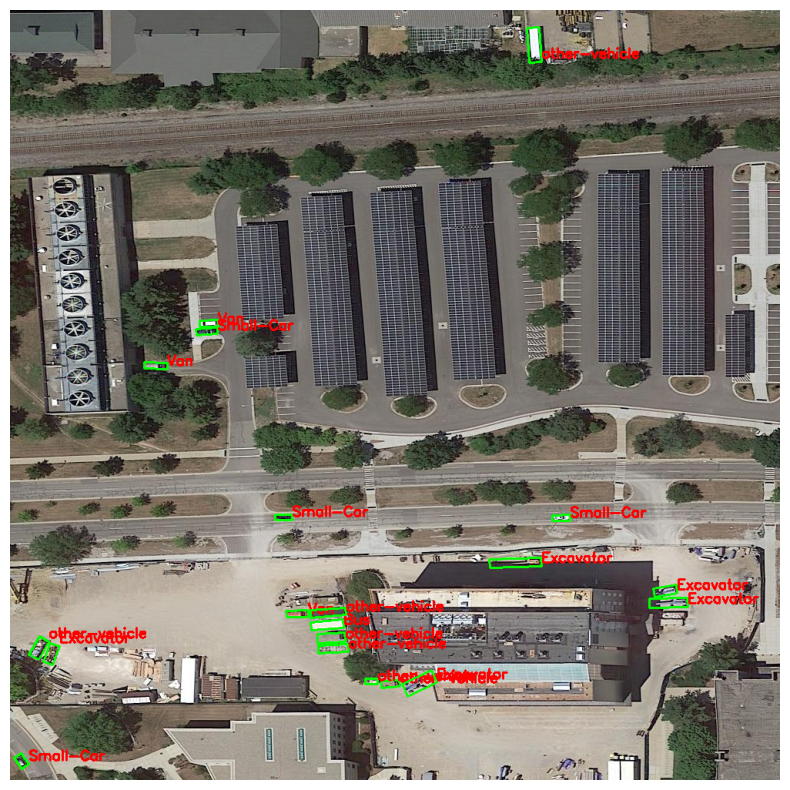

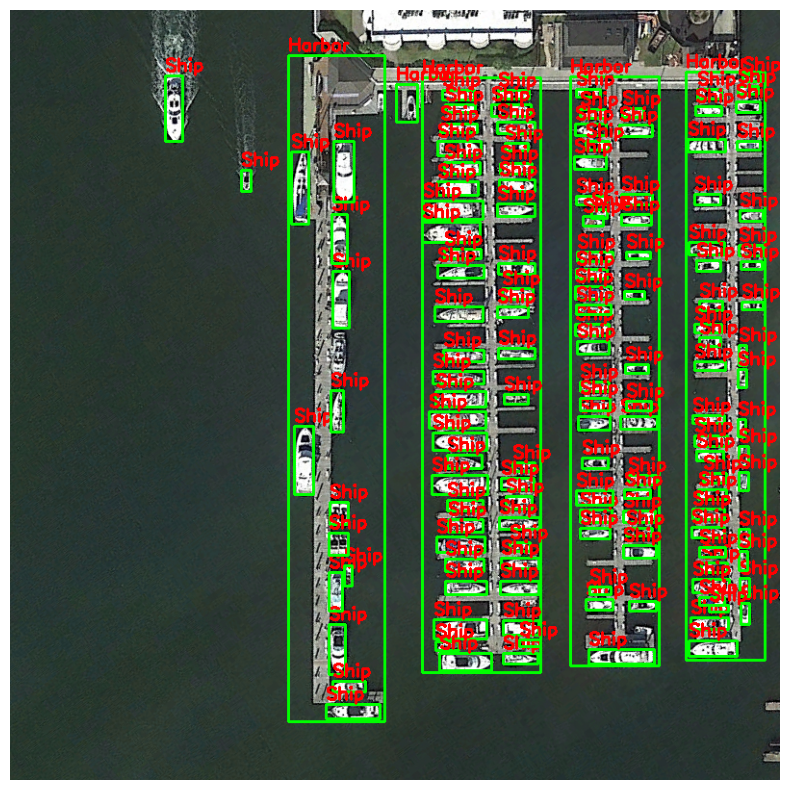

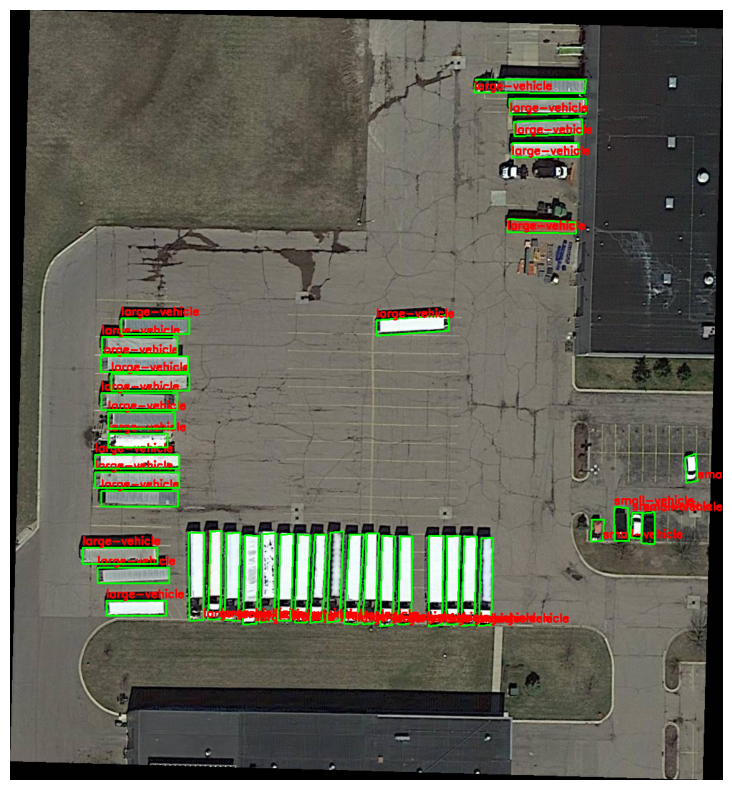

In [33]:
# FAIR1M
image_path = "D:\\stuff\\datasets\\FAIR1M\\fair1m_date_1922\\val\\images\\1.jpg"
label_path = "D:\\stuff\\datasets\\FAIR1M\\fair1m_date_1922\\val\\labelTxt\\1.txt"
show_image_with_boxes_fair1m(image_path, label_path)

# DIOR
image_path = "D:\\stuff\\datasets\\DIOR\\archive\\images\\00007.jpg"
label_path = "D:\\stuff\\datasets\\DIOR\\archive\\labels\\00007.txt"
show_image_with_boxes_dior(image_path, label_path)

# DOTAv2
image_path = "D:\\stuff\\datasets\\DOTAv2\\DOTAv2\\images\\train\\P0008.jpg"
label_path = "D:\\stuff\\datasets\\DOTAv2\\DOTAv2\\labels\\DOTA-v2.0_train (original format)\\P0008.txt"
show_image_with_boxes_dotav2(image_path, label_path)